# Thesis 2020-2021: Data Visualization

In this notebook, we will make different visualizations of the data to extract as much as possible insights from it.

In [2]:
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

In [4]:
import csv
    
df_train = pd.read_csv('data/hateval2019_en_train.csv')
df_dev = pd.read_csv('data/hateval2019_en_dev.csv')

df_train_dev = df_train.append(df_dev, ignore_index=True)
#df_train_dev = df_train_dev.drop(['TR', 'AG'], axis=1)
df_train_dev

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0
9998,19199,I hate bitches who talk about niggaz with kids...,1,0,1


## Plot pie en bar charts: hateful vs non-hateful, individual vs group, aggressive vs non-aggressive

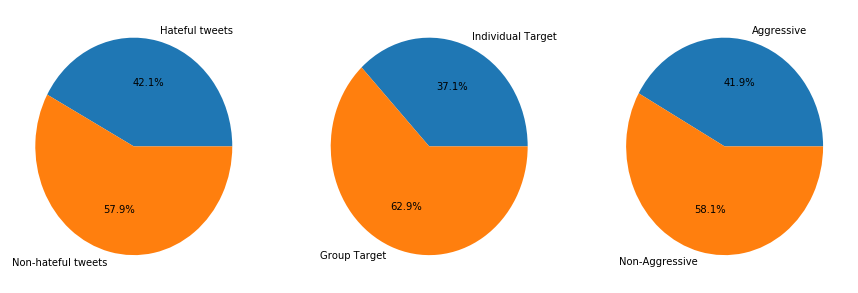

In [27]:
from matplotlib import pyplot as plt
import numpy as np

data1 = np.array([0.9, 0.1])
data2 = np.array([0.6, 0.4])
amount_HS = sum(df_train_dev['HS'])
amount_TR = sum(df_train_dev['TR'])
amount_AG = sum(df_train_dev['AG'])

HS = [amount_HS, df_train_dev.shape[0] - amount_HS]
TR = [amount_TR, amount_HS - amount_TR]
AG = [amount_AG, amount_HS - amount_AG]

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# plot each pie chart in a separate subplot
ax1.pie(HS, labels = ['Hateful tweets', 'Non-hateful tweets'], autopct='%1.1f%%')
ax2.pie(TR, labels = ['Individual Target', 'Group Target'], autopct='%1.1f%%')
ax3.pie(AG, labels = ['Aggressive', 'Non-Aggressive'], autopct='%1.1f%%')

plt.show()

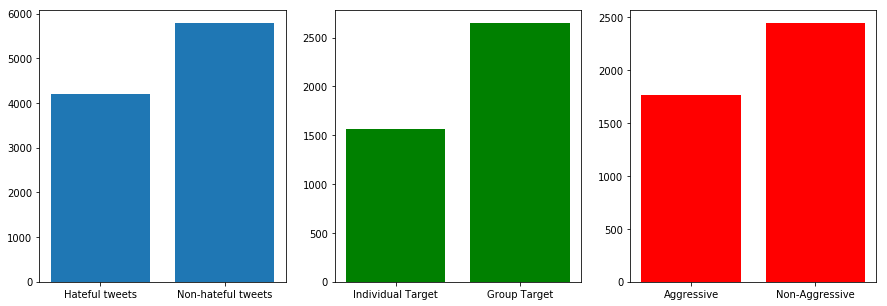

In [33]:
# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

# plot each pie chart in a separate subplot
ax1.bar(['Hateful tweets', 'Non-hateful tweets'], HS)
ax2.bar(['Individual Target', 'Group Target'], TR, color='green')
ax3.bar(['Aggressive', 'Non-Aggressive'], AG, color='red')

plt.show()

## WORLD CLOUD

In [62]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
print(lemmatizer.lemmatize("gamer"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
gamer


In [162]:
from textblob import TextBlob, Word
#nltk.download('punkt') 
#nltk.download('averaged_perceptron_tagger')

# Define function to lemmatize each word with its POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

# Lemmatize
sentence = "The striped bats are hanging on their feet for best"
lemmatize_with_postag(sentence)
#> 'The striped bat be hang on their foot for best'

'The striped bat be hang on their foot for best'

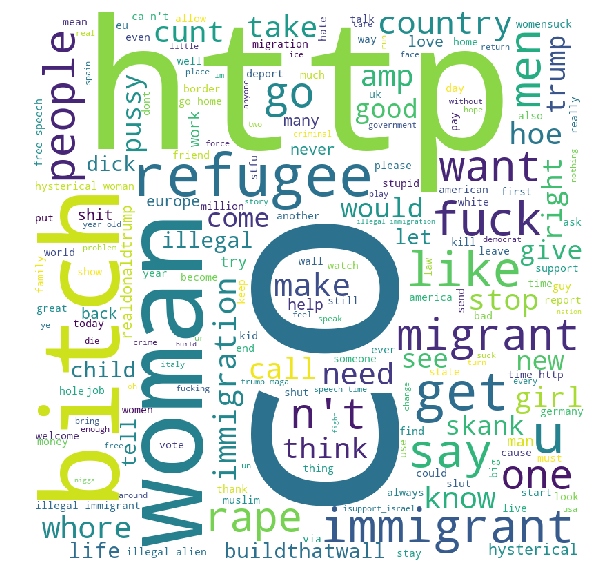

In [85]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

# Init the Wordnet Lemmatizer
#lemmatizer = WordNetLemmatizer()

# Lemmatize Single Word
#print(lemmatizer.lemmatize("bats"))
#> bat

stop_words = set(stopwords.words('english'))

comment_words = ''
#stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_train_dev.text: 
  
    # split the value 
    tokens = lemmatize_with_postag(val).split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Most Frequently used words

In [89]:
tweets = [x for x in df_train_dev.text]
tokens = []
for tweet in tweets:
  for i in tweet.split():
    tokens.append(i)
    
print(f'Amount of tokens before: {len(tokens)}')
    
tokens_no_sw = [w for w in tokens if not w in stop_words]
token_dict = {}
for word in np.unique(tokens_no_sw):
    token_dict[word] = tokens_no_sw.count(word)

print(f'Amount of tokens after: {len(token_dict)}')

Amount of tokens before: 216631
Amount of tokens after: 44366


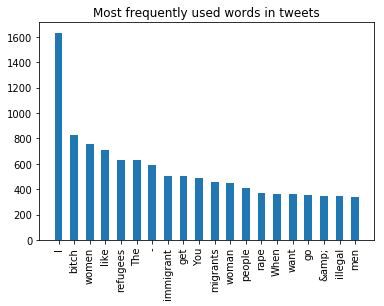

In [109]:
# TODO: make everything lowercase
# TODO: replace '&amp;' to 'and'

x_tokens = np.array(sorted(token_dict.items(), key = lambda x: -x[1]))[:20,0]
y_tokens = list(map(int, np.array(sorted(token_dict.items(), key = lambda x: -x[1]))[:20,1]))
y_tokens

plt.clf()
# set the plot title
plt.title("Most frequently used words in tweets")
# create a bar chart
plt.bar(x_tokens, y_tokens, width=0.5)
plt.xticks(rotation=90)
plt.show()

## Most Frequently used hashtags

In [216]:
import re

# iterate through the csv file 
all_text = ""
all_text_no_sw = ""
for val in df_train_dev.text: 
  
    # split the value 
    words = val.split()
    words_no_sw = [word for word in words if word not in stop_words]
    
    all_text += " ".join(words) + " "
    all_text_no_sw += " ".join(words_no_sw) + " "

In [172]:
# the regular expression 
regex = "#\w+"
    
# extracting the hashtags 
hashtag_list = re.findall(regex, all_text)

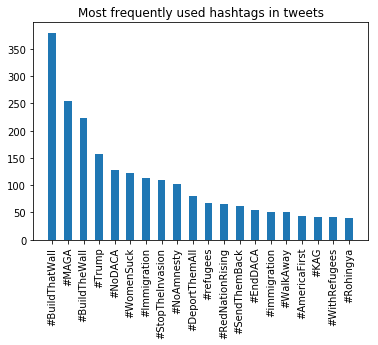

In [173]:
hashtag_dict = {}
for hashtag in np.unique(hashtag_list):
    hashtag_dict[hashtag] = hashtag_list.count(hashtag)
    
x_hashtags = np.array(sorted(hashtag_dict.items(), key = lambda x: -x[1]))[:20,0]
y_hashtags = list(map(int, np.array(sorted(hashtag_dict.items(), key = lambda x: -x[1]))[:20,1]))<

plt.clf()
# set the plot title
plt.title("Most frequently used hashtags in tweets")
# create a bar chart
plt.bar(x_hashtags, y_hashtags, width=0.5)
plt.xticks(rotation=90)
plt.show()

## Most frequently used Bigrams and Trigrams

In [210]:
from nltk import bigrams

list(bigrams("Hallo we are here".split()))

[('Hallo', 'we'), ('we', 'are'), ('are', 'here')]

In [225]:
from nltk.collocations import *

finder = BigramCollocationFinder.from_words(all_text_no_sw.split(), window_size = 2)
finder.apply_freq_filter(20)

for k,v in finder.ngram_fd.items():
    print(k,v)

('@potus', '@realDonaldTrump') 25
('#NoDACA', '#NoAmnesty') 22
('-', 'Free') 105
('Free', 'Speech') 105
('Speech', 'Time') 105
('Time', '-') 105
('I', 'hope') 34
('Muslim', 'migrants') 25
('via', '@YouTube') 53
('look', 'like') 29
('illegal', 'aliens') 28
('go', 'home') 35
('#Trump', '#MAGA') 93
('We', 'need') 34
('immigrant', 'children') 38
('illegal', 'migrants') 38
('Syrian', 'refugees') 42
('#BuildThatWall', '#BuildThatWall') 21
('@realDonaldTrump', '#BuildTheWall') 21
('Illegal', 'Alien') 45
('year', 'old') 28
('go', 'back') 33
('illegal', 'immigrants') 53
('No', 'one') 20
('I', 'would') 26
('#MAGA', '#RedNationRising') 39
('I', 'think') 49
('illegal', 'immigrant') 35
('Illegal', 'Aliens') 22
('âž_x009d_', 'https://t.co/QzFjSqWwJ8') 23
('Shut', 'fuck') 25
('I', 'want') 38
('I', 'dont') 21
('I', 'see') 20
('immigrant', 'families') 25
('I', 'like') 22
('I', 'love') 32
('I', 'know') 41
('rape', 'women') 22
('How', 'many') 21
('I', 'hate') 37
('I', 'don’t') 22
('If', 'I') 21
('I', 'ne

In [237]:
from nltk.collocations import *

finder = TrigramCollocationFinder.from_words(all_text_no_sw.split(), window_size = 3)
finder.apply_freq_filter()

for k,v in finder.ngram_fd.items():
    print(k,v)

('#EndDACA', '#BoycottNFL', '#BoycottNike') 10
('-', 'Free', 'Speech') 105
('Free', 'Speech', 'Time') 105
('Speech', 'Time', '-') 105
('here"', '-', 'Free') 5
('#KAG', '#POTUS', '#Trump') 8
('#POTUS', '#Trump', '#NEWS') 8
('#Trump', '#NEWS', '#VoteRed') 8
('#NEWS', '#VoteRed', '#NoDACA') 7
('#VoteRed', '#NoDACA', '#WalkAway') 6
('#NoDACA', '#WalkAway', '#AmericaFirst') 6
('#WalkAway', '#AmericaFirst', '#USA') 6
('#MAGA', '#BuildTheWall', '#NoDACA') 7
('#RedNationRising', '#Trump', '#MAGA') 8
('#Trump', '#MAGA', '#SendThemHome') 5
('The', 'German', 'Government') 15
('German', 'Government', 'Pays') 15
('Government', 'Pays', '3') 15
('Pays', '3', 'Week') 15
('3', 'Week', 'Vacation') 15
('Week', 'Vacation', 'Refugees') 15
('Vacation', 'Refugees', 'Go') 15
('Refugees', 'Go', 'Home') 13
('@ChenGonSol', '@phoenixkhost', '@phillycustoms') 11
('@potus', '@realDonaldTrump', '#BuildTheWall') 20
('@realDonaldTrump', '#BuildTheWall', '#LockThemUp') 18
('#BuildTheWall', '#LockThemUp', '#EndDACA') 17

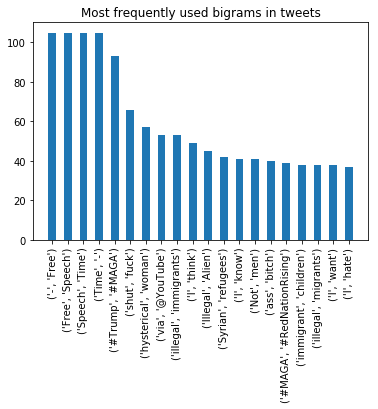

In [233]:
from nltk.collocations import *

finder = BigramCollocationFinder.from_words(all_text_no_sw.split(), window_size = 2)
finder.apply_freq_filter(20)

bigram_dict = {}
for k,v in finder.ngram_fd.items():
    bigram_dict[str(k)] = v
    #print(k,v)
    
x_bigrams = np.array(sorted(bigram_dict.items(), key = lambda x: -x[1]))[:20,0]
y_bigrams = list(map(int, np.array(sorted(bigram_dict.items(), key = lambda x: -x[1]))[:20,1]))

plt.clf()
# set the plot title
plt.title("Most frequently used bigrams in tweets")
# create a bar chart
plt.bar(x_bigrams, y_bigrams, width=0.5)
plt.xticks(rotation=90)
plt.show()

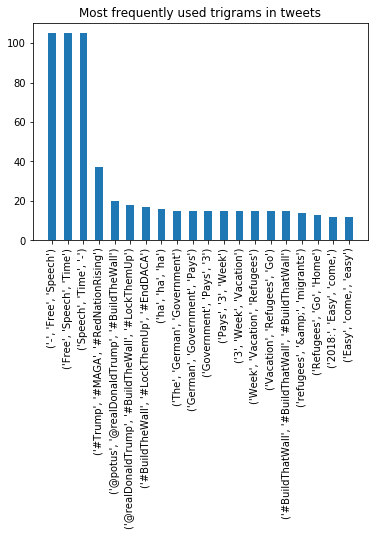

In [235]:
from nltk.collocations import *

finder = TrigramCollocationFinder.from_words(all_text_no_sw.split(), window_size = 3)
finder.apply_freq_filter(10)

bigram_dict = {}
for k,v in finder.ngram_fd.items():
    bigram_dict[str(k)] = v
    #print(k,v)
    
x_bigrams = np.array(sorted(bigram_dict.items(), key = lambda x: -x[1]))[:20,0]
y_bigrams = list(map(int, np.array(sorted(bigram_dict.items(), key = lambda x: -x[1]))[:20,1]))

plt.clf()
# set the plot title
plt.title("Most frequently used trigrams in tweets")
# create a bar chart
plt.bar(x_bigrams, y_bigrams, width=0.5)
plt.xticks(rotation=90)
plt.show()

## Add Subjectivity & Polarity columns, plot them + create simple baseline with Polarity

In [6]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df_train_dev['subjectivity'] = df_train_dev['text'].apply(getSubjectivity)
df_train_dev['polarity'] = df_train_dev['text'].apply(getPolarity)

df_train_dev

,id,text,HS,TR,AG,subjectivity,polarity
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0,0.500000,0.500000
1,202,Why would young fighting age men be the vast m...,1,0,0,0.425000,0.075000
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0,0.650000,-0.050000
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0,0.200000,0.050000
4,205,Orban in Brussels: European leaders are ignori...,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0,0.600000,-0.400000
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,1,1,0.600000,-0.400000
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,0,0,0.368333,-0.171667
9998,19199,I hate bitches who talk about niggaz with kids...,1,0,1,0.900000,-0.800000


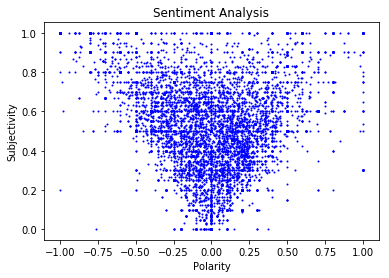

In [11]:
from textblob import TextBlob

# Plot the polarity and subjectivity
for i in range(df_train_dev.shape[0]):
    plt.scatter(df_train_dev['polarity'][i], df_train_dev['subjectivity'][i], color='Blue', s=1)
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Polarity baseline

In [7]:
df_test = pd.read_csv('data/hateval2019_en_test.csv')
df_test = df_test.drop(['TR', 'AG', 'HS'], axis=1)

df_test_polarity = df_test.copy()
df_test_polarity['polarity'] = df_test_polarity['text'].apply(getPolarity)

df_test_subjectivity = df_test.copy()
df_test_subjectivity['subjectivity'] = df_test_subjectivity['text'].apply(getSubjectivity)

In [23]:
# get HS label based on polarity
def get_HS_polarity(polarity):
    if (polarity < 0):
        return 1
    else:
        return 0

# Create new 'HS' column
df_test_polarity['HS'] = df_test_polarity['polarity'].apply(get_HS_polarity)
df_test_polarity

,id,text,polarity,HS
0,34243,"@local1025 @njdotcom @GovMurphy Oh, I could ha...",0.175000,0
1,30593,Several of the wild fires in #california and #...,0.050000,0
2,31427,@JudicialWatch My question is how do you reset...,-0.204167,1
3,31694,"#Europe, you've got a problem! We must hurry...",0.000000,0
4,31865,This is outrageous! #StopIllegalImmigration #...,-1.000000,1
...,...,...,...,...
2995,31368,you can never take a L off a real bitch😩 im ho...,0.200000,0
2996,30104,@Brian_202 likes to call me a cunt & a bitch b...,0.000000,0
2997,31912,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,0.250000,0
2998,31000,If i see and know you a hoe why would i hit yo...,0.265341,0


In [24]:
import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook

# Create prediction file for the polarity_baseline
df_test_polarity[['id', 'HS']].to_csv('predictions/polarity_baseline.tsv', sep='\t', index=False, header=False)
df_test_polarity[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the polarity_baseline
evaluate.write_eval("scores_polarity")

taskA_fscore: 0.5782252507177447
taskA_precision: 0.5842060599424352
taskA_recall: 0.5785714285714285
taskA_accuracy: 0.6006666666666667


In [99]:
# Print the most positive tweets
sorted_positive_polarity = df_test_polarity.sort_values(by=['polarity'], ascending=False)
#print(sorted_positive_polarity.head())

for i in range(10):
    print(str(i) + ') ' + sorted_positive_polarity.iloc[i]['text'])
    print()

0) Sounds like an excellent idea. #BuildThatWall

1) Trump is a wicked son of a bitch. Can't get his way, so why not hurt everyone. Whoever said he was the best 4🇺🇸was… https://t.co/zdXEbZrcyC

2) @JoshSneddon6090 happy birthday bitch! Hope you have a fab day you hoe n get on lifts soon 🚗 https://t.co/IpV9AFXax0

3) @marklutchman excellent observations. Let me add:"Don't give advice unless asked."Oprah, we didn't ask.#MAGA #KAG #POTUS #Trump #NEWS #VoteRed #NoDACA #WalkAway #AmericaFirst #USA #BackTheBlue #AllLivesMatter #LiberalismIsAMentalDisorder #LiberalLogic #LockHerUp

4) @AdamBandt if its gets you upset - Hes the best man for the job.#gohome #strongborders #sendthemback

5) Awesome news!!#KAG #MAGA #illegalaliens

6) I was thinking they found A WHOLE catheter in there and I was like bitch please but that is vile AF!!!!!!!!!!!!!!!!!!

7) @AnnCoulter @TuckerCarlson It was awesome!!! #BuildThatWall

8) @realDonaldTrump??????? Making America Awesome Again, #BuildThatWall.

9) LOL ha

## Subjectivity baseline

In [55]:
# get HS label based on subjectivity
def get_HS_subjectivity(subjectivity):
    if (subjectivity >= 0.50):
        return 1
    else:
        return 0

# Create new 'HS' column
df_test_subjectivity['HS'] = df_test_subjectivity['subjectivity'].apply(get_HS_subjectivity)
df_test_subjectivity

,id,text,subjectivity,HS
0,34243,"@local1025 @njdotcom @GovMurphy Oh, I could ha...",0.291667,0
1,30593,Several of the wild fires in #california and #...,0.200000,0
2,31427,@JudicialWatch My question is how do you reset...,0.462500,0
3,31694,"#Europe, you've got a problem! We must hurry...",0.000000,0
4,31865,This is outrageous! #StopIllegalImmigration #...,1.000000,1
...,...,...,...,...
2995,31368,you can never take a L off a real bitch😩 im ho...,0.300000,0
2996,30104,@Brian_202 likes to call me a cunt & a bitch b...,0.000000,0
2997,31912,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,0.333333,0
2998,31000,If i see and know you a hoe why would i hit yo...,0.388636,0


In [56]:
# Create prediction file for the subjectivity_baseline
df_test_subjectivity[['id', 'HS']].to_csv('predictions/subjectivity_baseline.tsv', sep='\t', index=False, header=False)
df_test_subjectivity[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the subjectivity_baseline
evaluate.write_eval("scores_subjectivity")

taskA_fscore: 0.5279671264843065
taskA_precision: 0.5280484370599831
taskA_recall: 0.5283935413245757
taskA_accuracy: 0.537


In [ ]:
# TODO: baseline - both subjectivity & polarity conditions together.